Problem 1: User input example

In [2]:
print('What numbers would you like to multiply')
number1=input('First number = ')
number2=input('Second number = ')
#This kind of input may be more useful in a regular python program than in a notebook, 
#because in a notebook the user could just edit a cell

What numbers would you like to multiply
First number = 3
Second number = 5


In [3]:
number1+number2  #what will this do: Python string addition. Try to multiply strings, it hates that.
#To do math, we need to change the strings to numbers.

'35'

In [4]:
int(number1)*int(number2)  #if you wanted to use decimals instead of integers, do float(number1)*float(number2)

15

Problem 2 relevant examples: String substitution

In [5]:
#Here is the most easy to read style of string substitution
SomePerson='Carrot Top'
SomePlace='Disneyland'
SomeActivity='eating french fried potatoes'
#We will drop these little strings into a new string using {} notation and the .format() method on the new string
'I saw {name} {activity} at {place} weeks ago'.format(name=SomePerson,place=SomePlace,activity=SomeActivity) #Name, place, activity don't have to be in order
#See https://realpython.com/python-string-formatting/ for other ways to do it; some ways are shorter but less legible

'I saw Carrot Top eating french fried potatoes at Disneyland weeks ago'

In [6]:
#Still on Problem 2, what if we had a number that was the result of a math operation, and we wanted to put it
#in the middle of a string??
SomeNumber=32/7
#Just try it
'I saw {name} {activity} at {place} {number} weeks ago'.format(name=SomePerson,place=SomePlace,activity=SomeActivity, number=SomeNumber)

'I saw Carrot Top eating french fried potatoes at Disneyland 4.571428571428571 weeks ago'

In [7]:
#Blech, why not round the number to fewer decimal places. Can we do it in place in the .format() method? 
#Yes check out how I change the {number} placeholder with a .2
#More about that here https://mkaz.blog/code/python-string-format-cookbook/
'I saw {name} {activity} at {place} {number:.2} weeks ago'.format(name=SomePerson,place=SomePlace,activity=SomeActivity, number=SomeNumber)

'I saw Carrot Top eating french fried potatoes at Disneyland 4.6 weeks ago'

Problem 3 relevant example: get user input and drop it into a plot title 

What should I use for a plot titleMy Great Plot


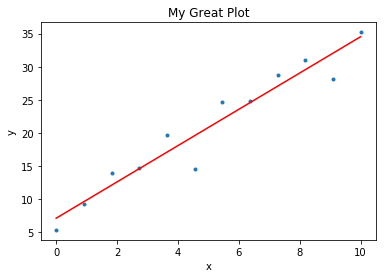

In [8]:
#First make a plot. I will review how to do a linear fit to some data here. The goal of a linear fit is find 
#M and B in y= Mx + B, where the (x,y) values are data from an experiment.

import numpy as np  #Now we have numpy available for this cell and all below. I don't have to insert it at the top cell
x=np.linspace(0,10,12)  #A new vector from 0 to 10 with 12 items
y= 3*x + 10*np.random.rand(len(x)) #"Data" with an underlying linear shape, but with added noise
#Adjust the multiplier on x to change the slope, and the multiplier on the random term to change the noise level.

from matplotlib import pyplot as plt #And we can make plots from here on down

#Do %matplotlib inline if plots aren't showing up
%matplotlib inline 

plt.plot(x,y,'.')  #3rd argument is the linespec, meaning how to display the points. Like MATLAB- Default is a blue line

p=np.polyfit(x,y,1) #With the 3rd argument of polyfit set at 1, p will be a "first order" fit. 
#p will contain 2 coefficients that describe a line.
#A length 2 vector [M,B] of best slope and y-intercept
#that minimize the distance of the data from the line ('least squares' method)
#The coefficients are listed in order of highest power to lowest.
#polyfit works the same way in MATLAB

M=p[0]  #Slope
B=p[1]  #Y-intercept


#Calculate a line that follows the fit by using polyval, and draw it on the plot
yfit=np.polyval(p,x) #Given the coefficient array p, polyval calculates y = Mx + B for each x in my x-vector. just like in matlab
plt.plot(x,yfit,'r') #linespec 'r' is a solid red line like in MATLAB

#Notice that M and B are changing a bit as we cycle through different random numbers. 
#In your homework, you will use the values of M and B
#to change the plot title, and will have to use the methods at the end of the previous section because you're going
#from the result of a math operation into a string. Here I will just ask for user input

plt.xlabel('x')
plt.ylabel('y')

MyPlotTitle=input('What should I use for a plot title')
plt.title(MyPlotTitle)

plt.savefig('MyExamplePlot.eps') #Savefig saves the plot in a format determined by the file extension you pick.
#This plot will be in the same folder as your .ipynb file.
#Try png, pdf, ps, eps and svg. .eps is a crisp vector format that can be edited in illustrator or other vector programs.

Problem 4 relevant example

In [9]:
#The problem says change every space in a sentence into a '*' using Python
#Much background info here https://automatetheboringstuff.com/chapter7/
#Here is a small text-replacement example

In [10]:
Mytext='what time would you like your breakfast'
Mytext=Mytext.replace('b','B')
Mytext=Mytext.replace('t','T')
Mytext=Mytext.replace('e','E')
Mytext

'whaT TimE would you likE your BrEakfasT'

Problem 5 relevant example

In [11]:
#Regular expressions look for patterns. 
#Test them here https://regex101.com/r/iC9sS4/1
#If I wanted to replace every pair of uppercase/lowercase letters with a 7
import re
text2=Mytext #get a copy of Mytext
re.sub(r'[A-Z][a-z]','7',text2) 


'whaT 7mE would you likE your 77kfasT'

Problem 6 relevant example

In [12]:
#Python "sets" can be used to find matching and unique items in a list
a = [1,2,3,4,"B",3]
b = [2, "B",8]
sa = set(a)
sb = set(b)
ListIntersection = sa.intersection(sb)
ListUnion = sa.union(sb)
ListIntersection,ListUnion  #note that Union doesn't show duplicate items
#You could use Intersection to find names of students taking both 322 and 412

({2, 'B'}, {1, 2, 3, 4, 8, 'B'})

Problem 7 relevant example

In [25]:
#When I collect data from sensors or send data to a machine that needs x,y coordinates,
#it seems like 90% of the time I am dealing with CSV files.
#CSV stands for comma-separated values
# 1,2,3
# 2,3,4
# 1,3,4
# 2,2,4  #Example of a CSV file that would create 3 columns with 4 rows when opened in Excel.
#When opened in Excel they look like a spreadsheet, and can be saved to Excel format

#How can we open and save .csv files....? See example below using loadtxt. There is also a csv library you can import 
CoordinateData= np.loadtxt('HW4RelevantCSVFile.csv', delimiter=',')
#If you need to skip some rows because there is header info, you can use the 'skiprows' argument with loadtxt
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html?highlight=loadtxt#numpy.loadtxt

XData=np.array(CoordinateData[:,0])
YData=np.array(CoordinateData[:,1])#I am making these a numpy array so I can do numpy things like add a constant.
#Or multiply by a float, like you would have to do when converting units.
CoordinateData,XData,YData #Look at what we brought in. You can use these coordinates for Prob 7 or make your own.



(array([[ 2. ,  3. ],
        [ 3. ,  5. ],
        [ 4. ,  6. ],
        [ 5.6,  8. ],
        [ 7. ,  9. ],
        [11. , 12. ],
        [14. ,  9. ],
        [18. ,  8. ],
        [19. ,  6.2],
        [22. ,  3. ],
        [34. ,  1. ]]),
 array([ 2. ,  3. ,  4. ,  5.6,  7. , 11. , 14. , 18. , 19. , 22. , 34. ]),
 array([ 3. ,  5. ,  6. ,  8. ,  9. , 12. ,  9. ,  8. ,  6.2,  3. ,  1. ]))

In [26]:
#Now write it to a file!!! And change it a bit
YDataModified=YData+3
f=open('MyModifiedCoordinates.csv','w')  #New filename, and w is for write. Change .csv to .txt -- it doesn't care
for i in range(0,len(XData)):
    f.write("%.3f,%.3f\r\n"%(XData[i],YDataModified[i])) #Here is another example of string substitution
f.write("\r\n")

2

Problem 8 relevant example

In [14]:
#You could see Prob 8 as another regex problem like "This time we are looking to replace any 5 non-space characters"
#Or it is a chance to use the split function. You could use split to separate the text block into strings.
#Then use Python to find all 5 letter strings. Then, reassemble! Here is an example

RandomExampleTextFromMyEmail='As you already know, ECCS and all of the divisions in the Engineering Directorate are half way through our first year of no deadlines for our core programs.  We continue to encourage submissions to all our core programs at any time throughout the year and remind you that Program Directors in those programs are available to discuss your research ideas and provide feedback if you have any questions about program alignment'
RandomWords=RandomExampleTextFromMyEmail.split() #Default split works on white space. 
#It is going to leave a comma on the end of one of the words but that is okay for now
RandomWords[1], RandomWords[5], RandomWords [12]  #Show what happened: RandomWords is a list of the individual words



('you', 'and', 'Engineering')

In [15]:
NewWords=[] #Blank new list to collect modified and unmodified words
for word in RandomWords:  #word is a new variable I made up, it will cycle through each item in RandomWords in order
    if word[0]=='d':  #if the first letter of a word is lowercase d  (here you could instead do a length test or whatever)
        NewWords.append(word[::-1])#Modify the word somehow. Here I am reversing the word
    else:
        NewWords.append(word) #Here I am leaving the word alone because it didn't start with 'd'
    
NewWords

['As',
 'you',
 'already',
 'know,',
 'ECCS',
 'and',
 'all',
 'of',
 'the',
 'snoisivid',
 'in',
 'the',
 'Engineering',
 'Directorate',
 'are',
 'half',
 'way',
 'through',
 'our',
 'first',
 'year',
 'of',
 'no',
 'senildaed',
 'for',
 'our',
 'core',
 'programs.',
 'We',
 'continue',
 'to',
 'encourage',
 'submissions',
 'to',
 'all',
 'our',
 'core',
 'programs',
 'at',
 'any',
 'time',
 'throughout',
 'the',
 'year',
 'and',
 'remind',
 'you',
 'that',
 'Program',
 'Directors',
 'in',
 'those',
 'programs',
 'are',
 'available',
 'to',
 'ssucsid',
 'your',
 'research',
 'ideas',
 'and',
 'provide',
 'feedback',
 'if',
 'you',
 'have',
 'any',
 'questions',
 'about',
 'program',
 'alignment']

In [16]:
#Make it back into a single string
ModifiedText=' '.join(NewWords)  #This syntax takes a space ' ' and applies the join method. Join NewWords together with a space in between
ModifiedText

'As you already know, ECCS and all of the snoisivid in the Engineering Directorate are half way through our first year of no senildaed for our core programs. We continue to encourage submissions to all our core programs at any time throughout the year and remind you that Program Directors in those programs are available to ssucsid your research ideas and provide feedback if you have any questions about program alignment'

In [17]:
#Yes I have questions about what 'snoisivid' is